1. Package import

In [145]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#sigmoid function
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

2. make array and initilize value

In [146]:
datanum= 100

epoch = 20000000

# array for graph
train_loss_Array=np.zeros((epoch,1))

W2_Array=np.zeros((epoch,1))
W1_Array=np.zeros((epoch,1))
W0_Array=np.zeros((epoch,1))

x_epoch=np.arange(epoch)


3. read train data

In [147]:

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]


4. Processing Gradient decent(training) and getting tr and test loss 

In [148]:
lr=0.001 #learning Rate

W2=np.random.randn(1)*0.1
W1=np.random.randn(1)*0.1
W0=np.random.randn(1)*0.1

W2_=np.zeros(1)
W1_=np.zeros(1)
W0_=np.zeros(1)

for iter in range(epoch):
    
    #calculate the train loss
    z =W0 + W1 * x + W2 * y
    h =sigmoid(z)
    loss=-(label*np.log(h)+(1-label)*np.log(1-h))
#     print(loss)
    loss=1/datanum*np.sum(loss)
#     print(loss)
    train_loss_Array[iter]=loss
    
    
    W0_ = 1/datanum*np.sum(h-label)
    W1_ = 1/datanum*np.sum((h-label)*x)
    W2_ = 1/datanum*np.sum((h-label)*y)

    # update the parameters
    W0 = W0 - W0_ * lr
    W1 = W1 - W1_ * lr
    W2 = W2 - W2_ * lr
    
    W0_Array[iter] = W0
    W1_Array[iter] = W1
    W2_Array[iter] = W2
 

5. Plot the training data

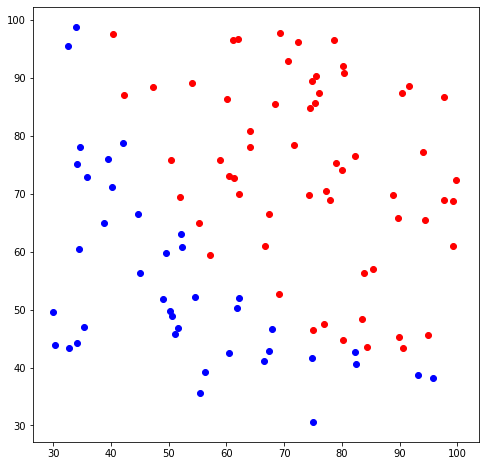

In [149]:
plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.show()

5. plotting the parameters

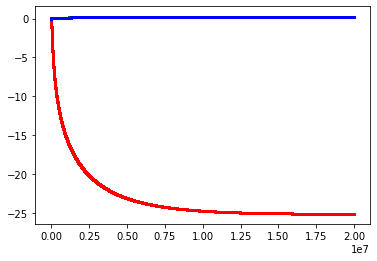

In [150]:
plt.scatter(x_epoch,W1_Array,c="green",s=2)
plt.scatter(x_epoch,W2_Array,c="blue",s=2)

plt.show()

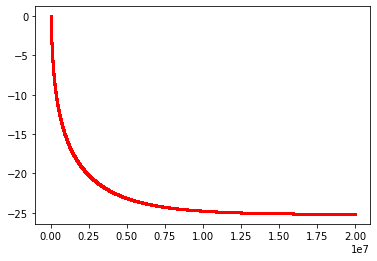

In [153]:
plt.scatter(x_epoch,W0_Array,c="red",s=2)
plt.show()

6. plotting training loss

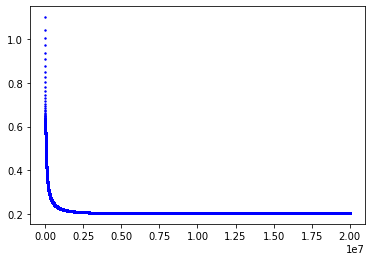

In [151]:
plt.scatter(x_epoch,train_loss_Array,c="b",s=2)
plt.show()

7. plotting testing loss

(140, 140, 2)


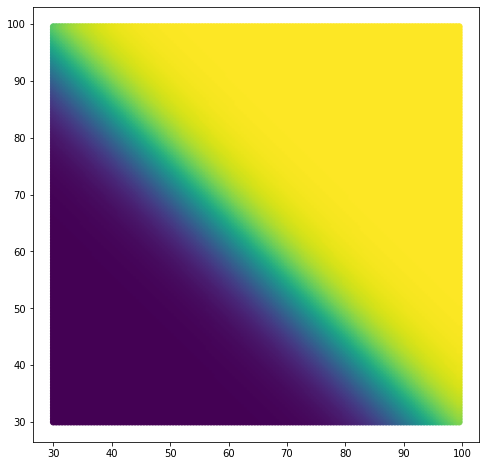

In [156]:
testData = np.arange(30, 100, 0.5)

testX = np.zeros((140,140,2))
testY = np.zeros((140,140,1))
print(testX.shape)
for i in range(140):
    for j in range(140):
        testX[i][j][0]=testData[i]
        testX[i][j][1]=testData[j]

tZ=W0 +testX[:,:,0] * W1 + testX[:,:,1] * W2
testY=sigmoid(tZ)

plt.figure(figsize=(8, 8))
plt.scatter(testX[:,:,0],testX[:,:,1], c=testY)
plt.show()
